In [1]:
import sqlite3
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-whitegrid')

### using sql database

In [3]:
con = sqlite3.connect('database.sqlite')
df_country = pd.read_sql_query("SELECT * FROM Country", con)
df_league = pd.read_sql_query("SELECT * FROM League", con)
df_match = pd.read_sql_query("SELECT * FROM Match", con)
df_player = pd.read_sql_query("SELECT * FROM Player", con)
df_player_attr = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
df_team = pd.read_sql_query("SELECT * FROM Team", con)
df_team_attr = pd.read_sql_query("SELECT * FROM Team_Attributes", con)

### Assessing-&-Cleaning

In [4]:
df_country.info()
df_country['name']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


0         Belgium
1         England
2          France
3         Germany
4           Italy
5     Netherlands
6          Poland
7        Portugal
8        Scotland
9           Spain
10    Switzerland
Name: name, dtype: object

In [5]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [6]:
#League Dataset

In [7]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [8]:
df_league.info()
df_league['name'].value_counts()
df_league['country_id'].duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


0

#### Match-Dataset

In [9]:
df_match.head()
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [10]:
type(df_match['season'][0])

str

In [11]:
df_match.isnull().sum()


id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [12]:
def test(name, id):
    name = name.split()[0]
    return id, name 

league_id_name = df_league[['id', 'name']].apply(lambda x: test(x['name'], x['id']), axis=1)
dict(league_id_name.values)

{1: 'Belgium',
 1729: 'England',
 4769: 'France',
 7809: 'Germany',
 10257: 'Italy',
 13274: 'Netherlands',
 15722: 'Poland',
 17642: 'Portugal',
 19694: 'Scotland',
 21518: 'Spain',
 24558: 'Switzerland'}

In [13]:
df_match['league_name'] = df_match['league_id'].map(dict(league_id_name.values))
df_match['league_name'].value_counts()


Spain          3040
England        3040
France         3040
Italy          3017
Germany        2448
Netherlands    2448
Portugal       2052
Poland         1920
Scotland       1824
Belgium        1728
Switzerland    1422
Name: league_name, dtype: int64

In [14]:
df_match['season'].value_counts()

2015/2016    3326
2008/2009    3326
2014/2015    3325
2012/2013    3260
2010/2011    3260
2009/2010    3230
2011/2012    3220
2013/2014    3032
Name: season, dtype: int64

In [15]:
df_match['away_team_goal'].value_counts()

1    8989
0    8687
2    5146
3    2145
4     718
5     215
6      63
7      10
8       5
9       1
Name: away_team_goal, dtype: int64

In [16]:
df_match.columns.values

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

In [17]:
df_match['home_player_1'].value_counts()

31293.0     149
41097.0     145
26295.0     142
42422.0     141
31465.0     141
           ... 
180284.0      1
38628.0       1
240338.0      1
268375.0      1
46130.0       1
Name: home_player_1, Length: 906, dtype: int64

In [18]:
#Player-Dataset

In [19]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [20]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [21]:
df_player['birthday'] = pd.to_datetime(df_player['birthday'])
df_player['birthday'].dt.year.value_counts()

1988    802
1989    723
1987    722
1986    710
1991    699
1990    696
1992    643
1984    607
1985    593
1983    541
1993    529
1982    487
1981    475
1994    462
1980    434
1979    345
1995    331
1978    263
1996    234
1977    191
1976    156
1975    113
1997    103
1974     77
1973     43
1998     24
1972     22
1971     12
1970     12
1969      6
1999      3
1967      1
1968      1
Name: birthday, dtype: int64

In [22]:
df_player['age'] = (2016 - df_player['birthday'].dt.year)
df_player['age'].value_counts()

28    802
27    723
29    722
30    710
25    699
26    696
24    643
32    607
31    593
33    541
23    529
34    487
35    475
22    462
36    434
37    345
21    331
38    263
20    234
39    191
40    156
41    113
19    103
42     77
43     43
18     24
44     22
45     12
46     12
47      6
17      3
49      1
48      1
Name: age, dtype: int64

In [23]:
df_player['age'].min(),df_player['age'].max(), 

(17, 49)

In [24]:
df_player['age'].mean()

29.357142857142858

In [25]:
bin_edges = [16, 23, 30, 35, 40, 49] # Fill in this list with five values you just found
bin_names = ['17:23', '23:30', '30:35', '35:40', '40:49'] # Name each acidity level category

df_player['player_age_stage'] = pd.cut(df_player['age'], bin_edges, labels=bin_names, right=True)
df_player['player_age_stage'].value_counts()

23:30    4995
30:35    2703
17:23    1686
35:40    1389
40:49     287
Name: player_age_stage, dtype: int64

In [26]:
#Player_attr-Dataset

In [27]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [28]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [29]:
df_player_attr['date'] = pd.to_datetime(df_player_attr['date'])
df_player_attr['season'] = df_player_attr['date'].dt.year
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007


In [30]:
player_name_id = dict(df_player[['player_api_id', 'player_name']].values)
df_player_attr['player_name'] = df_player_attr['player_api_id'].map(player_name_id)

In [31]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [32]:
#Team_attr-Dataset

In [33]:
df_team_attr.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [34]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [35]:
team_short_name = dict(df_team[['team_api_id', 'team_long_name']].values)
df_team_attr['team_long_name'] = df_team_attr['team_api_id'].map(team_short_name)
df_team_attr['team_long_name'].value_counts()

Widzew Łódź             8
Śląsk Wrocław           6
St. Johnstone FC        6
Bari                    6
SC Freiburg             6
                       ..
KSV Roeselare           1
Dunfermline Athletic    1
Sparta Rotterdam        1
Boavista FC             1
FC Penafiel             1
Name: team_long_name, Length: 285, dtype: int64

In [36]:
df_team_attr['season'] = pd.to_datetime(df_team_attr['date']).dt.year

In [37]:
team_group = df_team_attr.groupby(['season', 'team_long_name'])

In [38]:
#Which leagues have the highest games ?

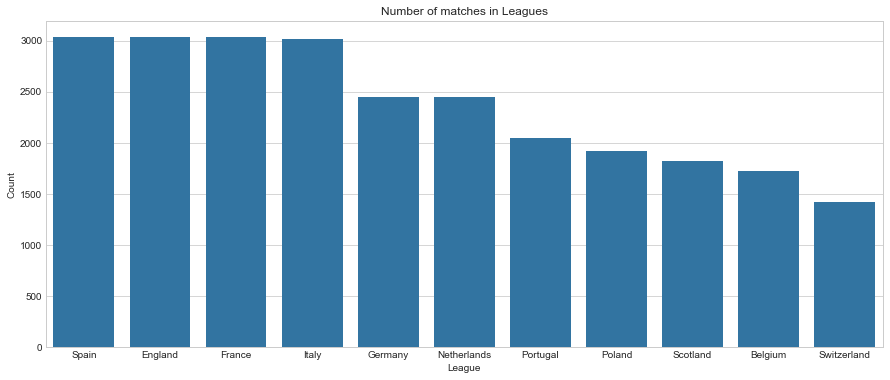

In [39]:
base_color = sns.color_palette()[0]
cat_order = df_match['league_name'].value_counts().index
sns.countplot(data=df_match, x='league_name', order=cat_order, color=base_color)
plt.xlabel("League")
plt.ylabel("Count")
plt.title("Number of matches in Leagues")
plt.show()

In [40]:
#Exploratory-Data-Analysis

In [41]:
# Which season have the highest games ?

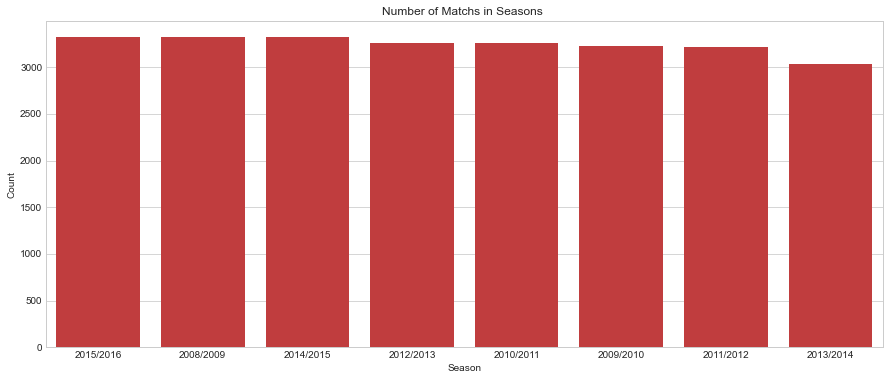

In [42]:
base_color = sns.color_palette()[3]
cat_order = df_match['season'].value_counts().index
sns.countplot(data=df_match, x='season', order = cat_order, color=base_color)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Number of Matchs in Seasons ")
plt.show()

In [43]:
# Who is the team that scores most the Away team or the Home team?

In [44]:
df_match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6,Belgium


In [45]:
melted = pd.melt(frame=df_match,id_vars='league_name',
                 value_vars=['away_team_goal', 'home_team_goal'])
melted

,league_name,variable,value
0,Belgium,away_team_goal,1
1,Belgium,away_team_goal,0
2,Belgium,away_team_goal,3
3,Belgium,away_team_goal,0
4,Belgium,away_team_goal,3
...,...,...,...
51953,Switzerland,home_team_goal,1
51954,Switzerland,home_team_goal,1
51955,Switzerland,home_team_goal,2
51956,Switzerland,home_team_goal,0


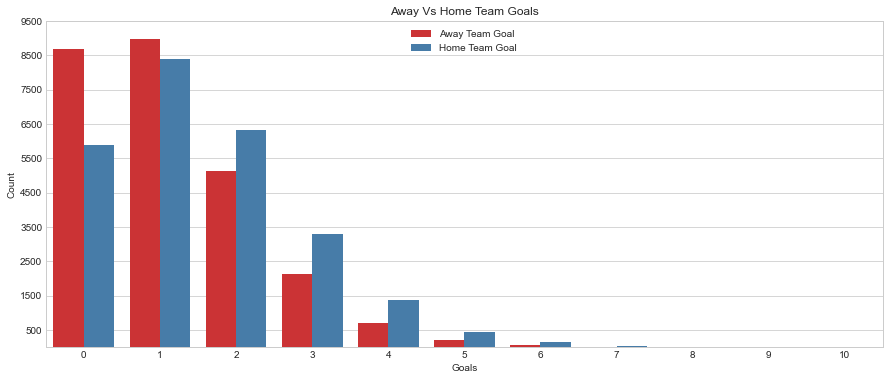

In [46]:
palette = sns.color_palette('Set1')
sns.countplot(data=melted, x='value', hue='variable', palette=palette)
plt.xlabel('Goals')
plt.ylabel('Count')
plt.title('Away Vs Home Team Goals')
plt.legend(['Away Team Goal', 'Home Team Goal'])
plt.yticks(np.arange(500, 10000, 1000))
plt.show()

In [47]:
# What is the average of goals for both home and away team in every league?

In [48]:
def estimator(x):
    return np.rint(np.mean(x))

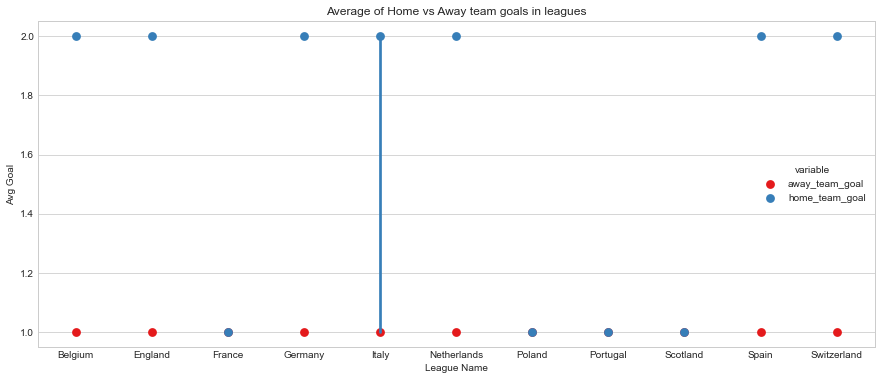

In [49]:
palette = sns.color_palette('Set1')
sns.pointplot(data=melted, y='value', x='league_name', hue='variable', palette=palette,
             estimator=estimator, linestyles='')

plt.xlabel('League Name')
plt.ylabel('Avg Goal')
plt.title('Average of Home vs Away team goals in leagues')
plt.show()

In [50]:
# What is the count of age stages ?

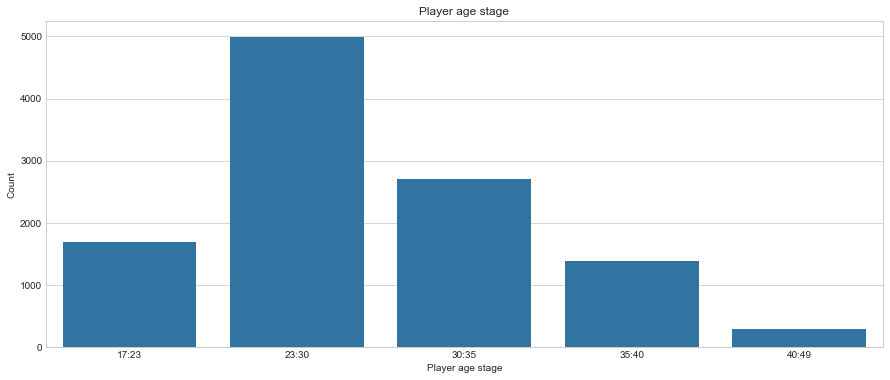

In [51]:
base_color = sns.color_palette()[0]

sns.countplot(data=df_player, x='player_age_stage', color=base_color)
plt.xlabel('Player age stage')
plt.ylabel('Count')
plt.title('Player age stage')
plt.show()

In [52]:
# What is the age distribution?

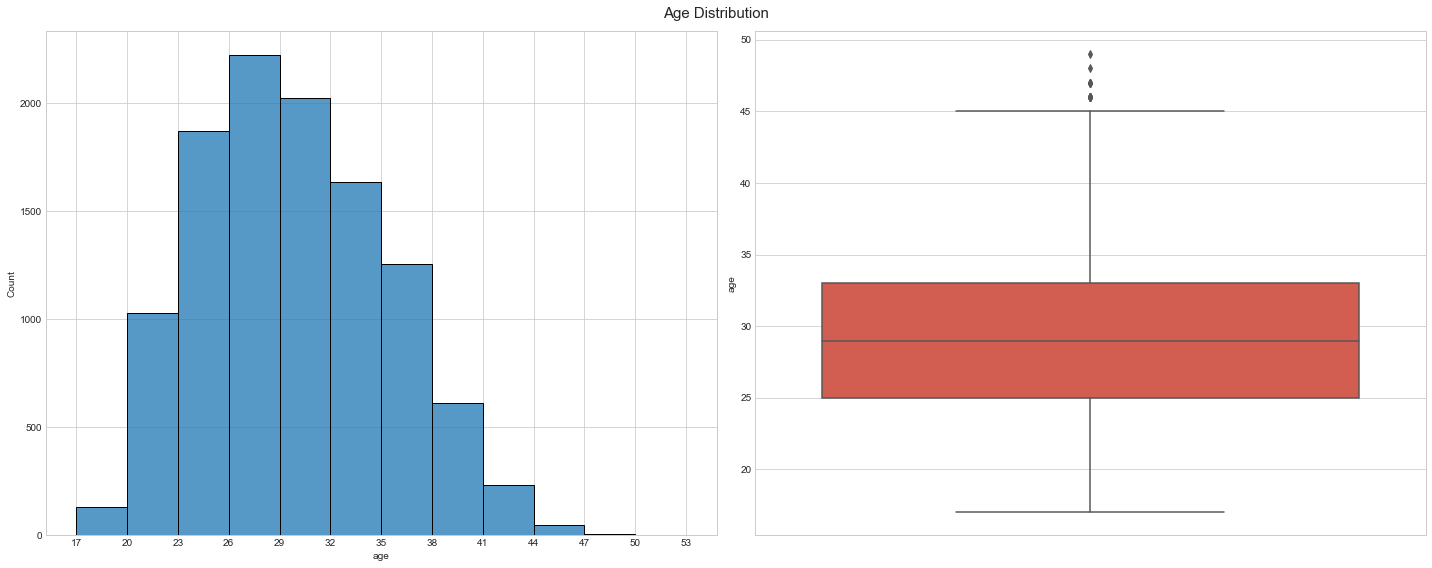

In [54]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
bin_edges = np.arange(df_player['age'].min(), df_player['age'].max()+5, 3)

sns.histplot(df_player['age'], bins=bin_edges)
plt.xticks(bin_edges)

plt.subplot(1,2,2)
sns.boxplot(data=df_player, y='age', color='#E74C3C')

plt.suptitle('Age Distribution', size=15)

plt.tight_layout()
plt.show()

In [55]:
# What is the distribution for both weight and height?

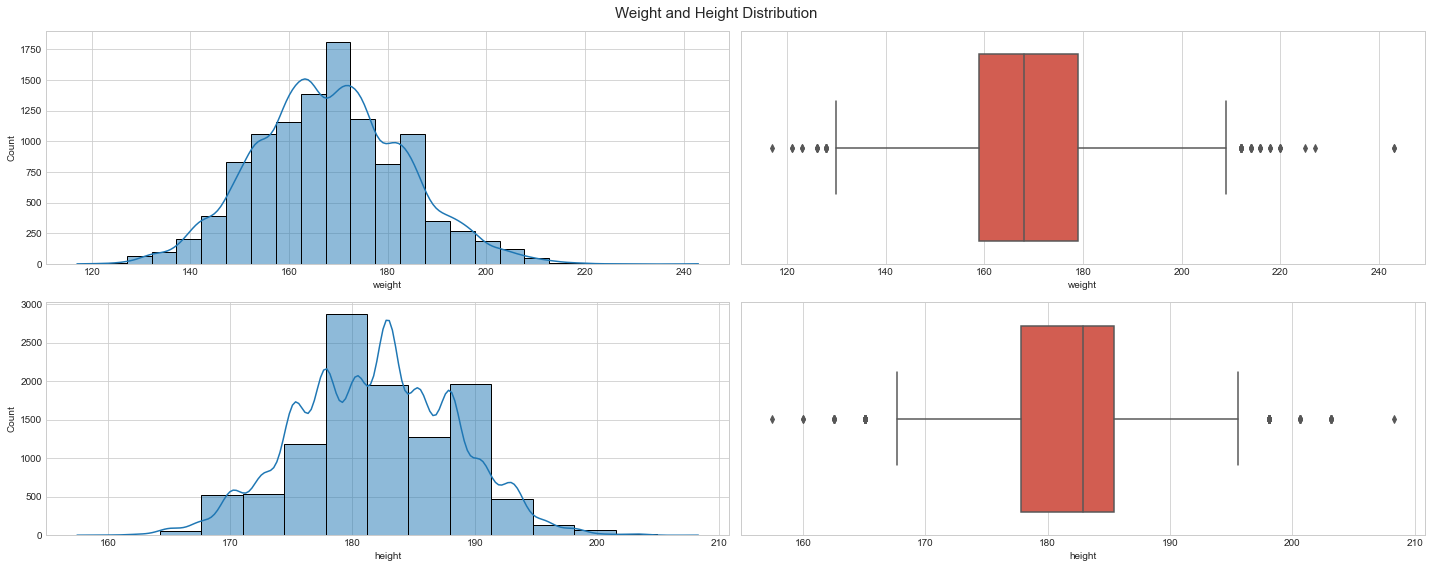

In [56]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
sns.histplot(data=df_player, x='weight', bins=25,kde=True);

plt.subplot(2,2,3)
sns.histplot(data=df_player, x='height', bins=15, kde=True);

plt.subplot(2,2,2)
sns.boxplot(data=df_player, x='weight', color='#E74C3C');

plt.subplot(2,2,4)
sns.boxplot(data=df_player, x='height', color='#E74C3C');

plt.suptitle('Weight and Height Distribution', size=15)
plt.tight_layout()

plt.show()

In [57]:
# What is the percentile for both weight and height?

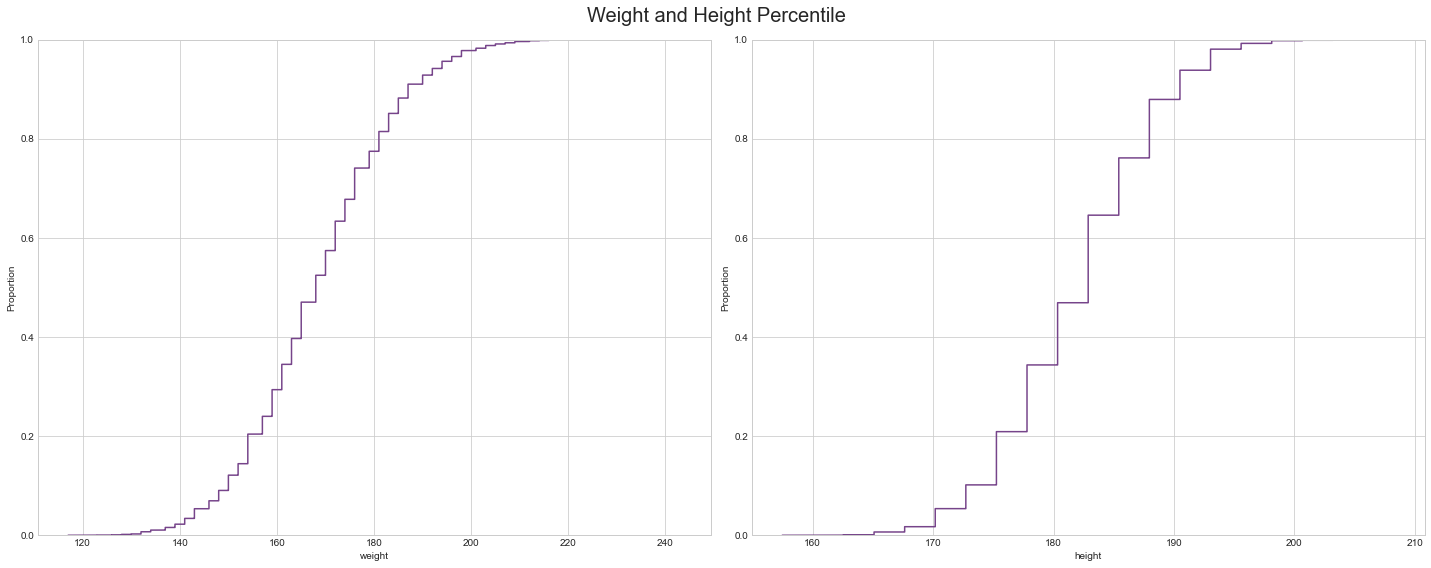

In [58]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.ecdfplot(df_player['weight'], color='#76448A');

plt.subplot(1,2,2)
sns.ecdfplot(df_player['height'], color='#76448A');

plt.suptitle('Weight and Height Percentile', size=20)
plt.tight_layout()
plt.show()

In [59]:
# if there are in relationship between height and weight?

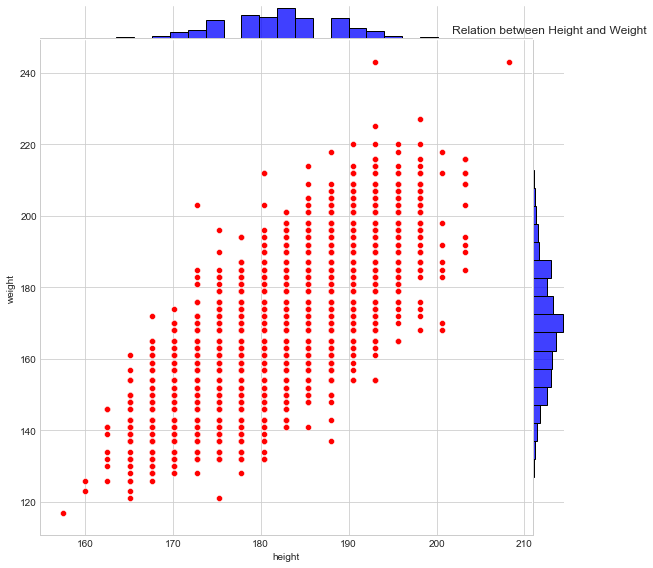

In [60]:
g = sns.JointGrid(data = df_player, y = 'weight', x = 'height', ratio=15, space=.05, height=8,
                 )
g.plot_joint(sns.scatterplot, color='red')
g.plot_marginals(sns.histplot, bins=25, color='blue')
plt.title('Relation between Height and Weight');

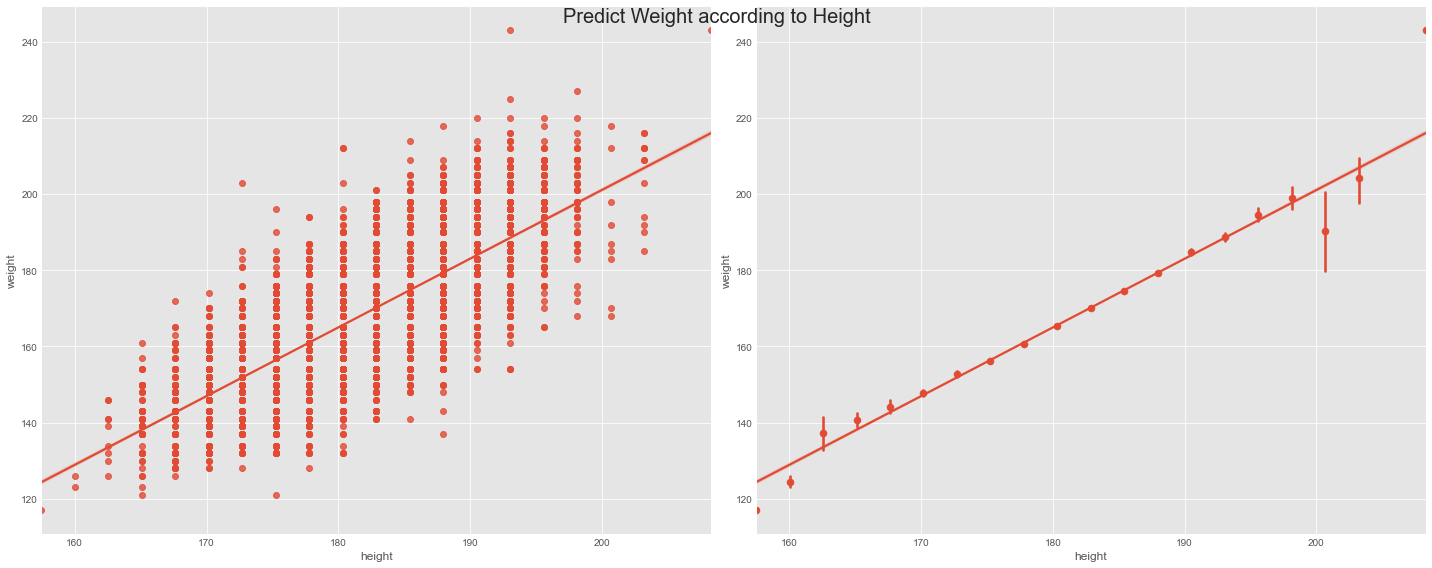

In [61]:
plt.figure(figsize=(20,8))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.regplot(data=df_player, y='weight', x='height')

plt.subplot(1,2,2)
sns.regplot(data=df_player, y='weight', x='height', x_estimator=np.mean)

plt.tight_layout()
plt.suptitle('Predict Weight according to Height', size=20)
plt.show()

In [62]:
#Top three players from 2007 to 2016

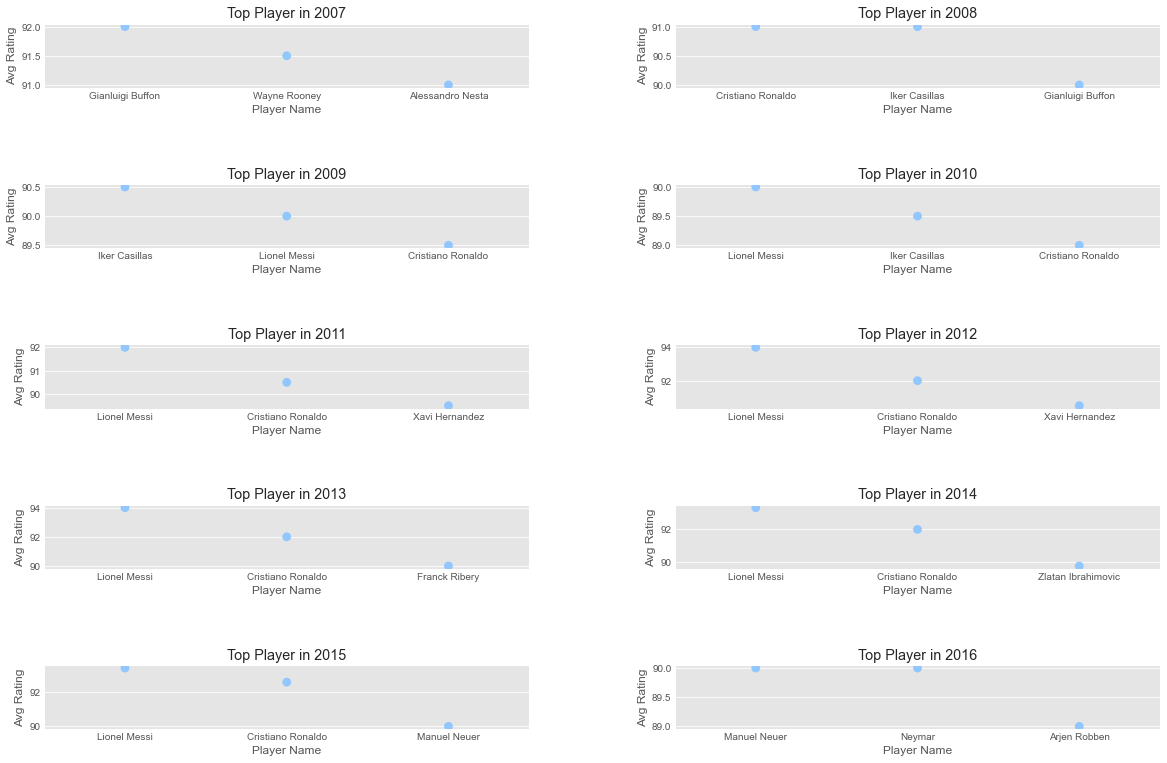

In [63]:
group = df_player_attr.groupby(['season', 'player_name'])
overall_rating = group['overall_rating'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = overall_rating[(overall_rating.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg Rating')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

In [65]:
# Who is the top three players in penalties from 2007 to 2016

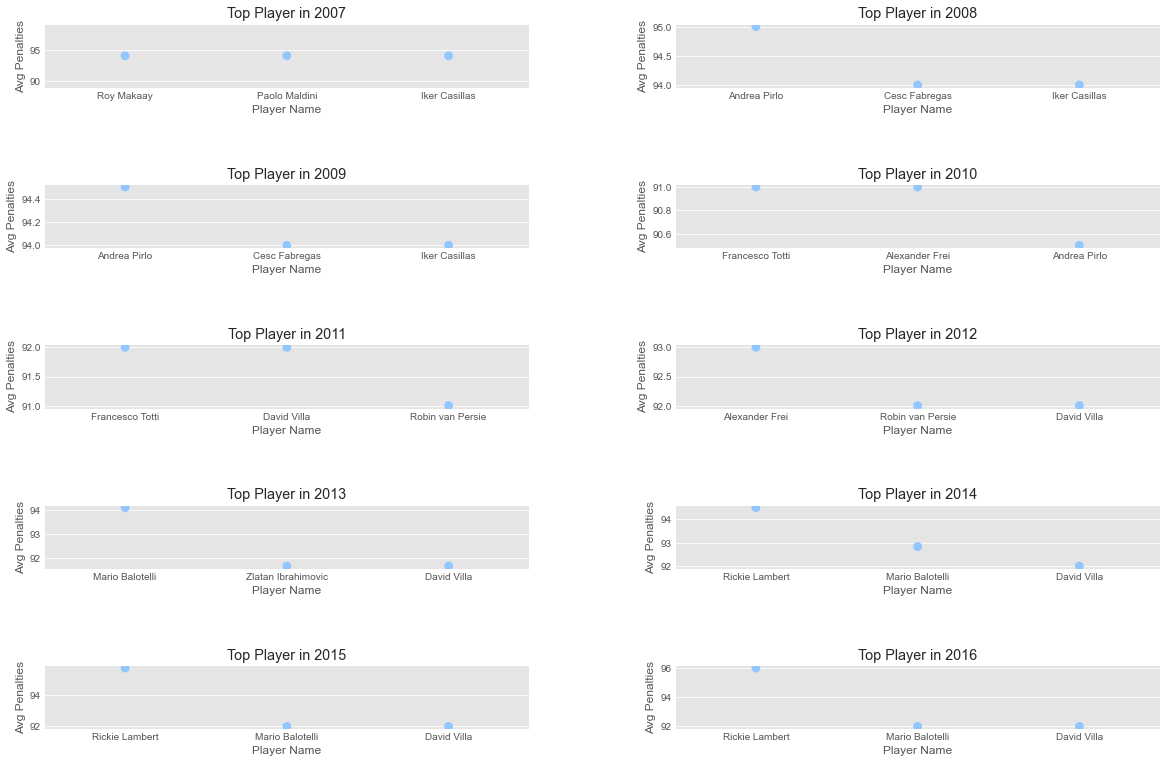

In [66]:
penalties = group['penalties'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = penalties[(penalties.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg Penalties')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

In [67]:
# Who is the top three players in finishing from 2007 to 2016

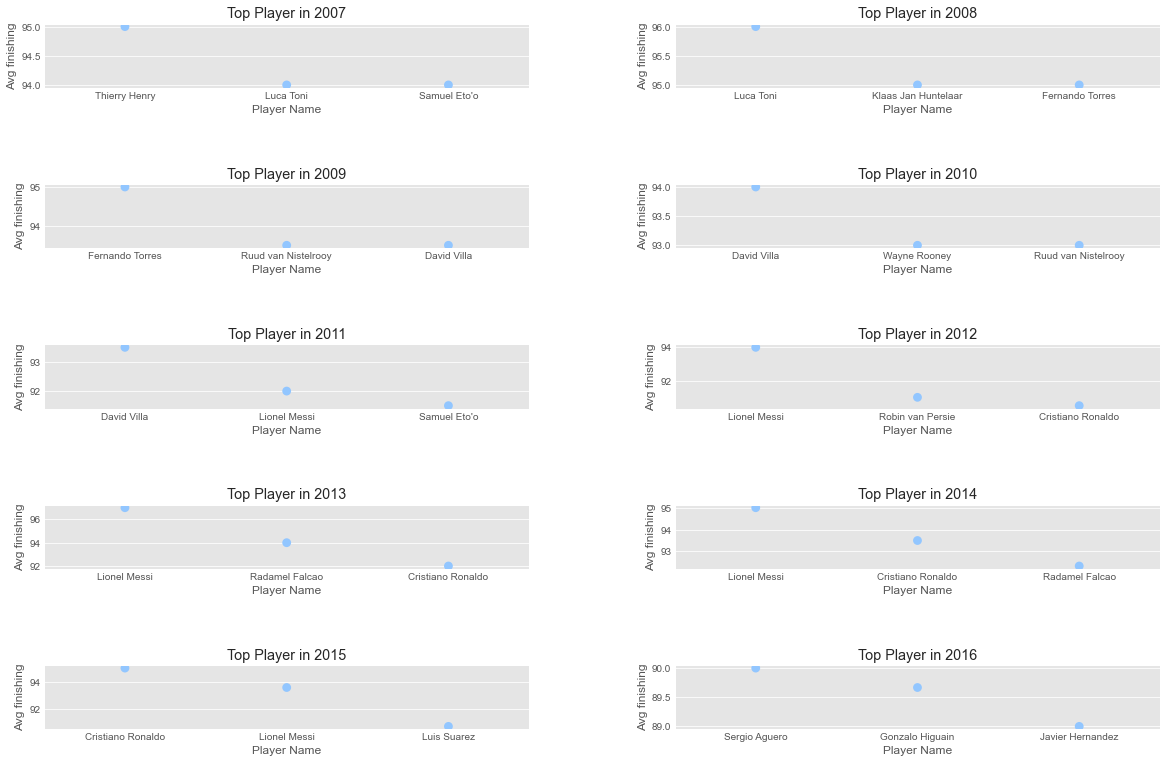

In [68]:
finishing = group['finishing'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = finishing[(finishing.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg finishing')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

In [69]:
## Who is the top three players in shot_power from 2007 to 2016

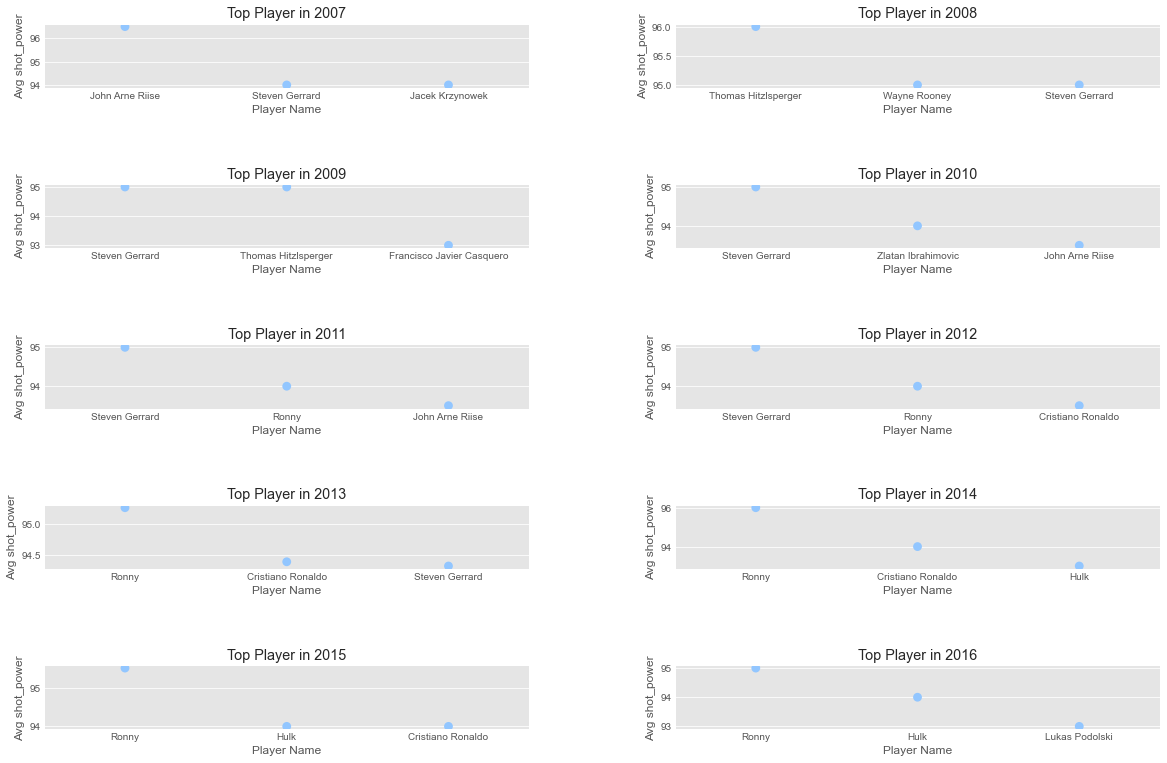

In [70]:
shot_power = group['shot_power'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = shot_power[(shot_power.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg shot_power')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

In [71]:
## Who is the top three players in jumping from 2007 to 2016

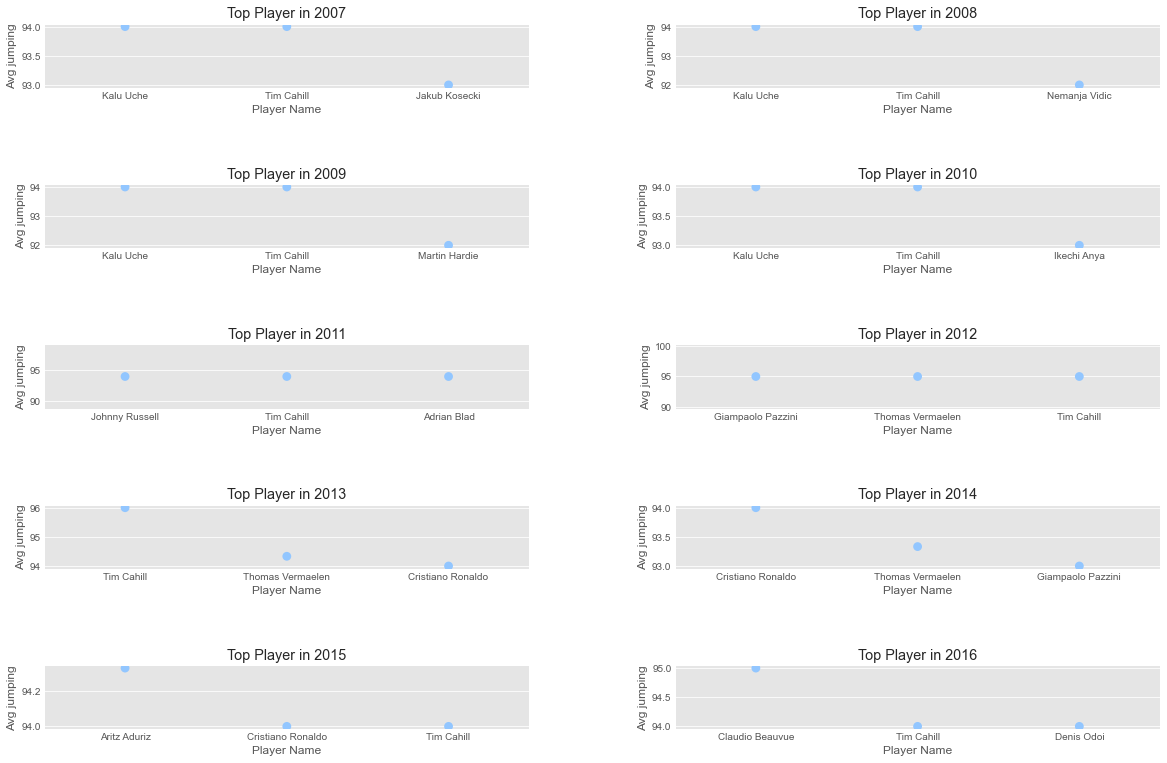

In [72]:
jumping = group['jumping'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = jumping[(jumping.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg jumping')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

In [73]:
## Who is the top three players in ball_control from 2007 to 2016

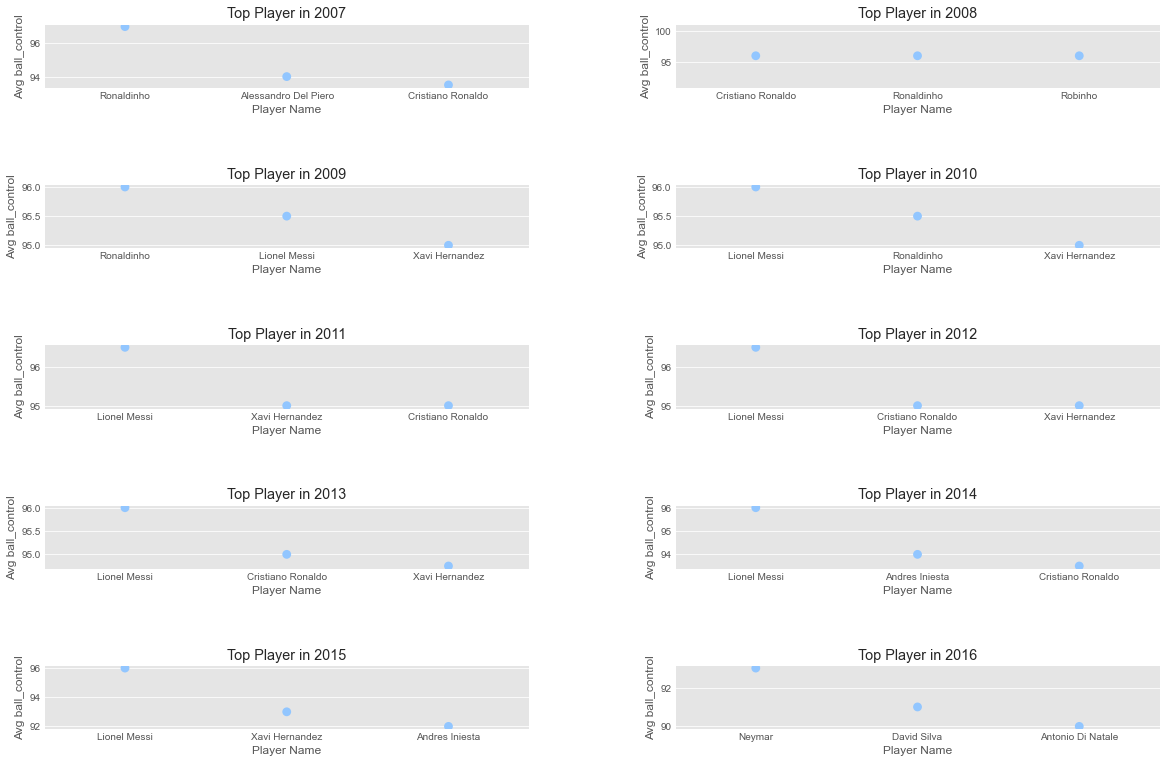

In [74]:
ball_control = group['ball_control'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = ball_control[(ball_control.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg ball_control')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

In [75]:
## Who is the top three players in crossing from 2007 to 2016

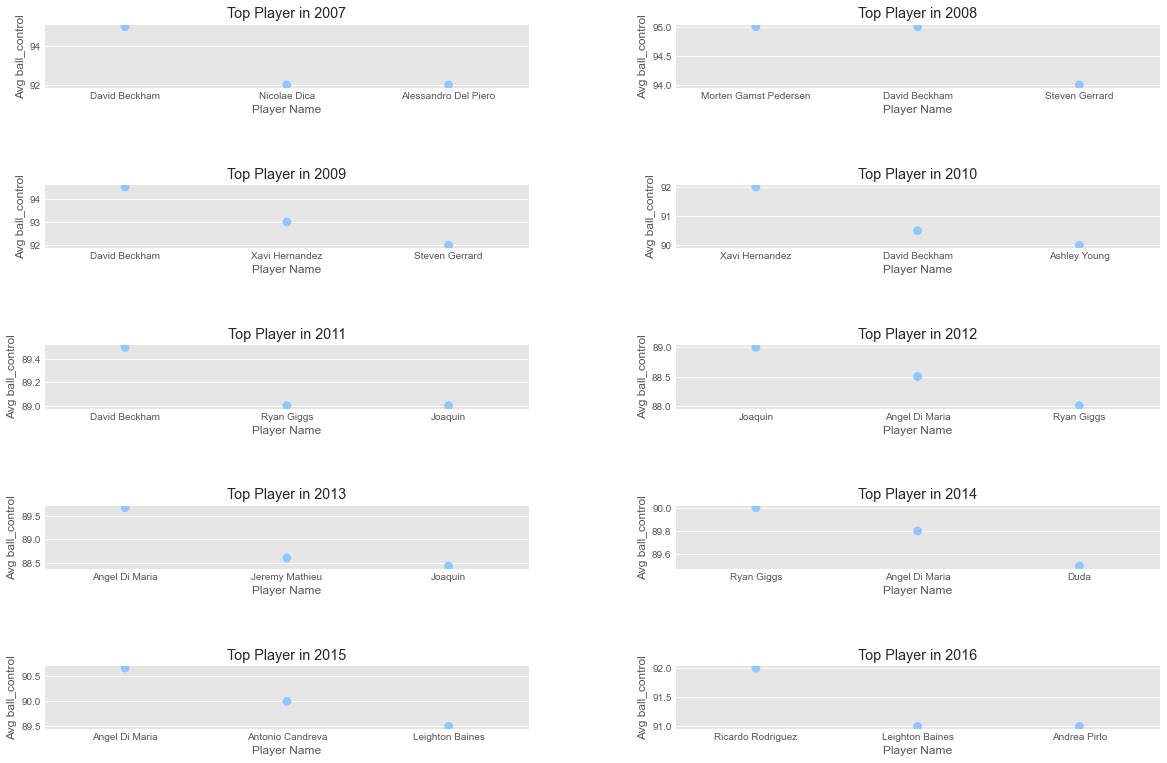

In [76]:
crossing = group['crossing'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = crossing[(crossing.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg ball_control')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

In [77]:
## Who is the top three teams in buildUpPlaySpeed from 2007 to 2016

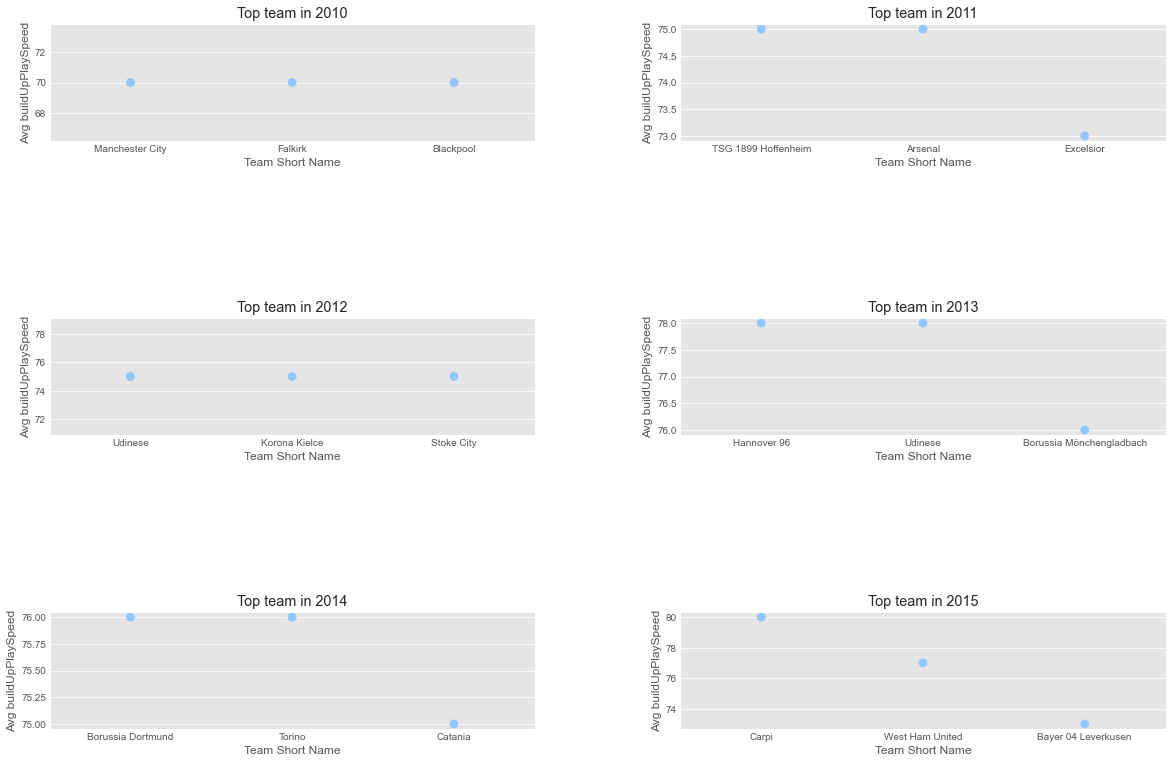

In [78]:
team_group['buildUpPlaySpeed'].min().sort_values(ascending=False)

buildUpPlaySpeed = team_group['buildUpPlaySpeed'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_team_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(3,2,i)
    x = buildUpPlaySpeed[(buildUpPlaySpeed.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Team Short Name')
    plt.ylabel('Avg buildUpPlaySpeed')
    plt.title(f'Top team in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

In [79]:
### Who is the top three teams in chanceCreationShooting from 2007 to 2016

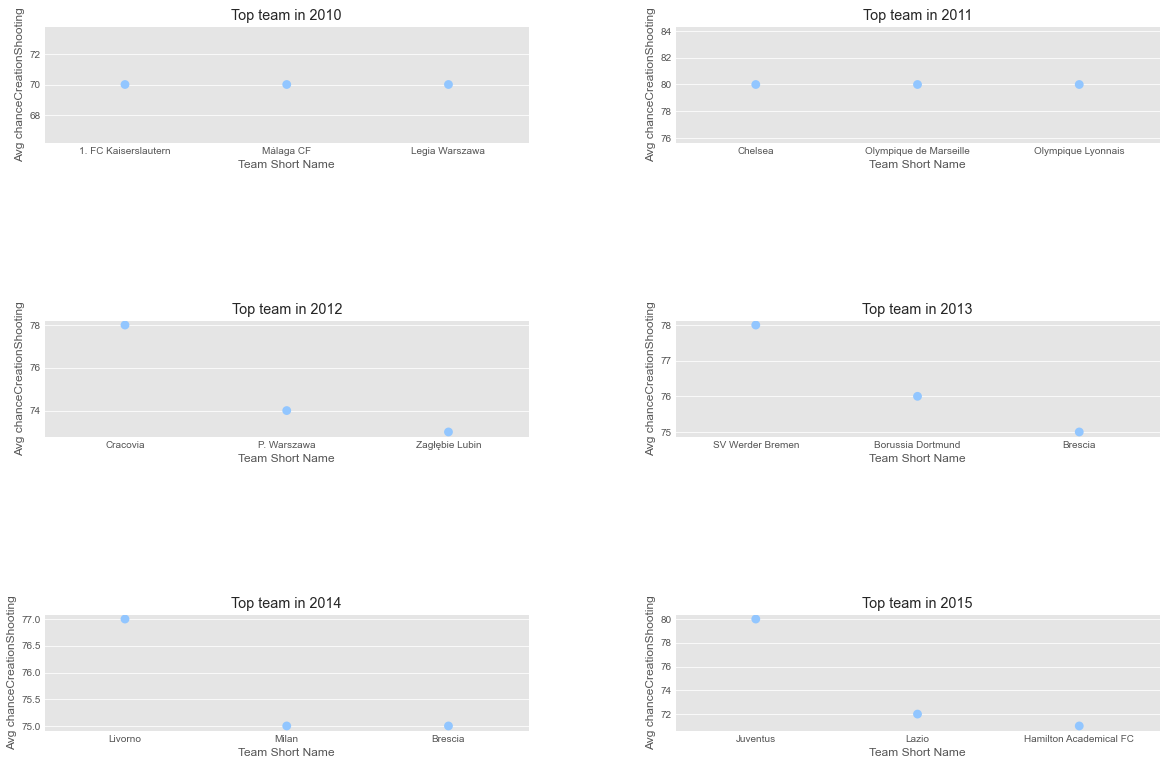

In [80]:
team_group['chanceCreationShooting'].min().sort_values(ascending=False)

chanceCreationShooting = team_group['chanceCreationShooting'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_team_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(3,2,i)
    x = chanceCreationShooting[(chanceCreationShooting.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Team Short Name')
    plt.ylabel('Avg chanceCreationShooting')
    plt.title(f'Top team in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

In [81]:
countries=df_country
leagues=df_league
matches=df_match
tempmatch=matches
# df_player = pd.read_sql_query("SELECT * FROM Player", con)
# df_player_attr = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
teams=df_team
matches3 = matches2 = matches

In [82]:
main_countries = ['England','Germany','Spain']
countries = countries[countries.name.isin(main_countries)]
leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))
seasons = matches.season.unique()
leagues

,id,name,country_id,name_y
0,1729,England,1729,England Premier League
1,7809,Germany,7809,Germany 1. Bundesliga
2,21518,Spain,21518,Spain LIGA BBVA


In [83]:
req_matches = matches[matches.league_id.isin(leagues['id'])]
req_matches = req_matches[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
req_matches["total_goals"] = req_matches['home_team_goal'] + req_matches['away_team_goal']
req_matches.dropna(inplace=True)
req_matches.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals
1728,1729,1729,10260,10261,1,1,2008/2009,2
1729,1730,1729,9825,8659,1,0,2008/2009,1
1730,1731,1729,8472,8650,0,1,2008/2009,1
1731,1732,1729,8654,8528,2,1,2008/2009,3
1732,1733,1729,10252,8456,4,2,2008/2009,6


In [84]:
def res(row):
    if row['home_team_goal'] == row['away_team_goal']:
        val = 0
    elif row['home_team_goal'] > row['away_team_goal']:
        val = 1
    else:
        val = -1
    return val

req_matches["result"] = req_matches.apply(res,axis = 1)
req_matches.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
1728,1729,1729,10260,10261,1,1,2008/2009,2,0
1729,1730,1729,9825,8659,1,0,2008/2009,1,1
1730,1731,1729,8472,8650,0,1,2008/2009,1,-1
1731,1732,1729,8654,8528,2,1,2008/2009,3,1
1732,1733,1729,10252,8456,4,2,2008/2009,6,1


In [85]:
new_matches = pd.merge(req_matches,leagues,left_on='league_id', right_on='id')
new_matches = new_matches.drop(['id_x','id_y','country_id'],axis = 1)
english = new_matches[new_matches.name == "England"]
spanish = new_matches[new_matches.name == "Spain"]
german = new_matches[new_matches.name == "Germany"]

display(english.head())
display(german.head())
display(spanish.tail())

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League
1,1729,9825,8659,1,0,2008/2009,1,1,England,England Premier League
2,1729,8472,8650,0,1,2008/2009,1,-1,England,England Premier League
3,1729,8654,8528,2,1,2008/2009,3,1,England,England Premier League
4,1729,10252,8456,4,2,2008/2009,6,1,England,England Premier League


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
3040,7809,9823,9790,2,2,2008/2009,4,0,Germany,Germany 1. Bundesliga
3041,7809,8178,9789,2,3,2008/2009,5,-1,Germany,Germany 1. Bundesliga
3042,7809,10189,9904,3,0,2008/2009,3,1,Germany,Germany 1. Bundesliga
3043,7809,8721,8722,2,1,2008/2009,3,1,Germany,Germany 1. Bundesliga
3044,7809,9810,8177,0,2,2008/2009,2,-1,Germany,Germany 1. Bundesliga


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
8523,21518,9906,10267,2,1,2015/2016,3,1,Spain,Spain LIGA BBVA
8524,21518,9864,9783,2,0,2015/2016,2,1,Spain,Spain LIGA BBVA
8525,21518,8315,9869,3,0,2015/2016,3,1,Spain,Spain LIGA BBVA
8526,21518,7878,8603,1,1,2015/2016,2,0,Spain,Spain LIGA BBVA
8527,21518,8370,8558,3,0,2015/2016,3,1,Spain,Spain LIGA BBVA


In [86]:
e = english.groupby('season')
s = spanish.groupby('season')
g = german.groupby('season')
seasons
display(e.head(2))
display(s.tail(2))
display(g.tail(2))

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League
1,1729,9825,8659,1,0,2008/2009,1,1,England,England Premier League
380,1729,10260,8658,1,0,2009/2010,1,1,England,England Premier League
381,1729,8586,8650,2,1,2009/2010,3,1,England,England Premier League
760,1729,10252,8654,3,0,2010/2011,3,1,England,England Premier League
761,1729,8655,8668,1,0,2010/2011,1,1,England,England Premier League
1140,1729,8655,8602,1,2,2011/2012,3,-1,England,England Premier League
1141,1729,9879,10252,0,0,2011/2012,0,0,England,England Premier League
1520,1729,9825,8472,0,0,2012/2013,0,0,England,England Premier League
1521,1729,8668,10260,1,0,2012/2013,1,1,England,England Premier League


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
5866,21518,9906,8661,2,0,2008/2009,2,1,Spain,Spain LIGA BBVA
5867,21518,10267,8696,2,4,2008/2009,6,-1,Spain,Spain LIGA BBVA
6246,21518,8394,9865,2,1,2009/2010,3,1,Spain,Spain LIGA BBVA
6247,21518,9864,10267,0,1,2009/2010,1,-1,Spain,Spain LIGA BBVA
6626,21518,9783,8558,3,0,2010/2011,3,1,Spain,Spain LIGA BBVA
6627,21518,8661,8581,2,1,2010/2011,3,1,Spain,Spain LIGA BBVA
7006,21518,8603,8370,0,2,2011/2012,2,-1,Spain,Spain LIGA BBVA
7007,21518,9869,7878,2,0,2011/2012,2,1,Spain,Spain LIGA BBVA
7386,21518,9910,9783,1,1,2012/2013,2,0,Spain,Spain LIGA BBVA
7387,21518,8370,8634,0,5,2012/2013,5,-1,Spain,Spain LIGA BBVA


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
3344,7809,9788,8295,1,0,2008/2009,1,1,Germany,Germany 1. Bundesliga
3345,7809,8226,9790,3,0,2008/2009,3,1,Germany,Germany 1. Bundesliga
3650,7809,8722,9905,1,0,2009/2010,1,1,Germany,Germany 1. Bundesliga
3651,7809,8165,8177,3,0,2009/2010,3,1,Germany,Germany 1. Bundesliga
3956,7809,9904,8722,2,1,2010/2011,3,1,Germany,Germany 1. Bundesliga
3957,7809,8165,8721,2,1,2010/2011,3,1,Germany,Germany 1. Bundesliga
4262,7809,8721,8165,2,1,2011/2012,3,1,Germany,Germany 1. Bundesliga
4263,7809,9788,8178,2,2,2011/2012,4,0,Germany,Germany 1. Bundesliga
4568,7809,8357,8697,1,1,2012/2013,2,0,Germany,Germany 1. Bundesliga
4569,7809,8194,8721,1,4,2012/2013,5,-1,Germany,Germany 1. Bundesliga


array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

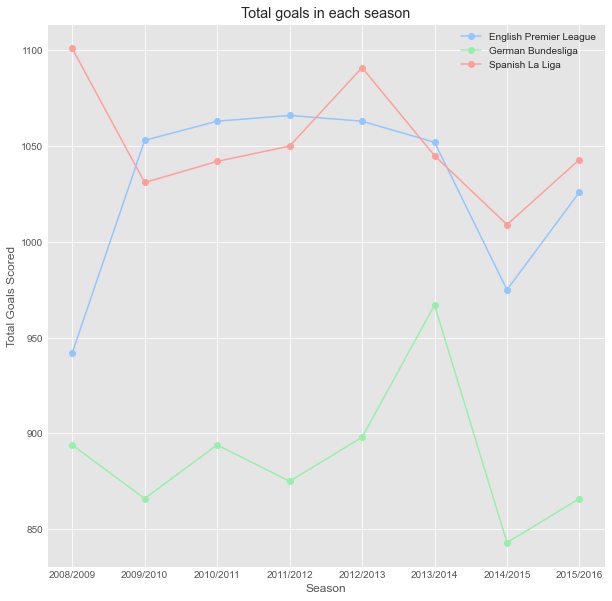

In [87]:
fig = plt.figure(figsize=(10, 10))
plt.title("Total goals in each season")
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.ylabel("Total Goals Scored")
num_seasons = range(len(seasons))

plt.plot(num_seasons,e.total_goals.sum().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,g.total_goals.sum().values,label = "German Bundesliga", marker = 'o')
plt.plot(num_seasons,s.total_goals.sum().values,label = "Spanish La Liga", marker = 'o')
plt.legend()
seasons

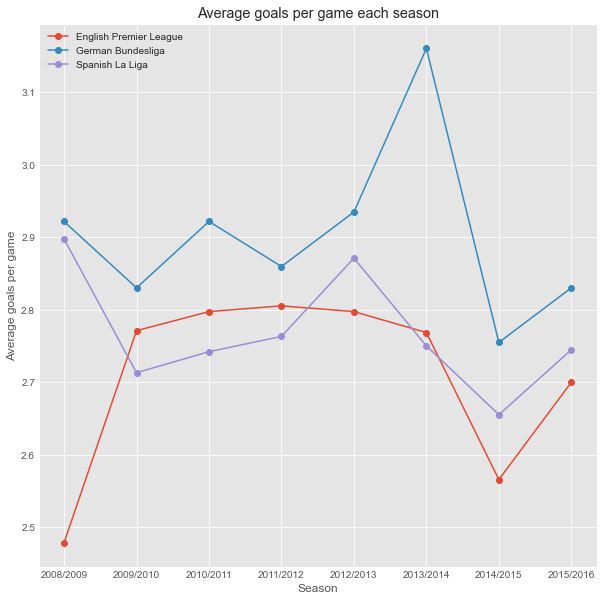

In [88]:
#Plotting average goals scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.title("Average goals per game each season")
plt.ylabel("Average goals per game")

plt.plot(num_seasons,e.total_goals.mean().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,g.total_goals.mean().values,label = "German Bundesliga", marker = 'o')
plt.plot(num_seasons,s.total_goals.mean().values,label = "Spanish La Liga", marker = 'o')
plt.legend(loc = 2)


In [89]:
average_goals_english = english.total_goals.mean()
average_goals_spanish = spanish.total_goals.mean()
average_goals_german = german.total_goals.mean()

In [90]:
#Merging Home team and matches

matches_h_teams = pd.merge(new_matches,teams,left_on='home_team_api_id', right_on='team_api_id')
matches_h_teams = matches_h_teams.drop(['id','team_api_id','team_fifa_api_id'],axis = 1)
matches_h_teams = matches_h_teams.rename(columns={'team_long_name':'home_team_long_name','name_y':'league_name','name':'country_name'})
matches_h_teams.head()

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,country_name,league_name,home_team_long_name,team_short_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League,Manchester United,MUN
1,1729,10260,8654,2,0,2008/2009,2,1,England,England Premier League,Manchester United,MUN
2,1729,10260,8667,4,3,2008/2009,7,1,England,England Premier League,Manchester United,MUN
3,1729,10260,10194,5,0,2008/2009,5,1,England,England Premier League,Manchester United,MUN
4,1729,10260,8472,1,0,2008/2009,1,1,England,England Premier League,Manchester United,MUN


Text(0.5, 0, 'Team name')

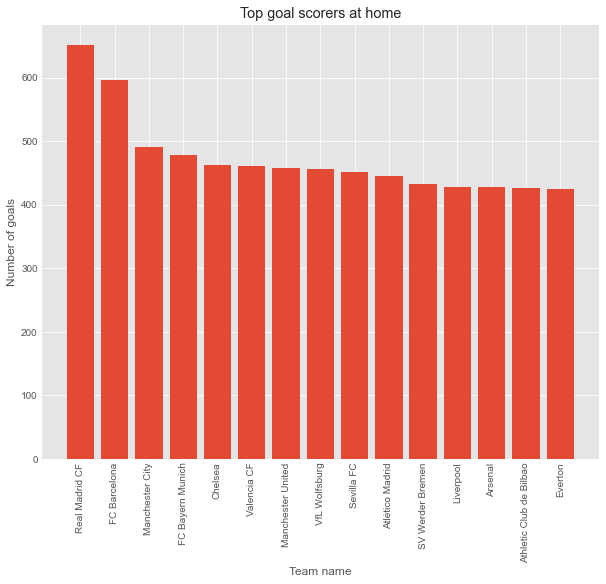

In [91]:
top_goal_scorers_home = matches_h_teams.groupby('home_team_long_name').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_home.head(15)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_home.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_home.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at home")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

In [92]:
#Merging Away team and matches

matches_a_teams = pd.merge(new_matches,teams,left_on='away_team_api_id', right_on='team_api_id')
matches_a_teams = matches_a_teams.drop(['id','team_api_id','team_fifa_api_id'],axis = 1)
matches_a_teams = matches_a_teams.rename(columns={'team_long_name':'away_team_long_name','name_y':'league_name','name':'country_name'})
matches_a_teams.head()


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,country_name,league_name,away_team_long_name,team_short_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League,Newcastle United,NEW
1,1729,9879,10261,2,1,2008/2009,3,1,England,England Premier League,Newcastle United,NEW
2,1729,8455,10261,0,0,2008/2009,0,0,England,England Premier League,Newcastle United,NEW
3,1729,8549,10261,0,0,2008/2009,0,0,England,England Premier League,Newcastle United,NEW
4,1729,8462,10261,0,3,2008/2009,3,-1,England,England Premier League,Newcastle United,NEW


Text(0.5, 0, 'Team name')

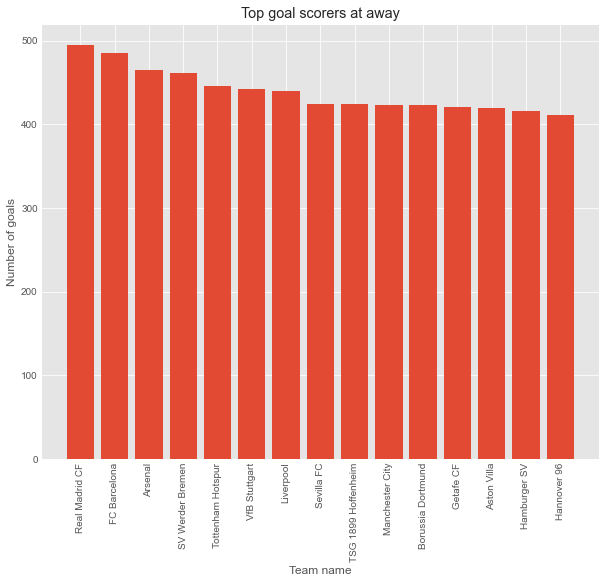

In [93]:
top_goal_scorers_away = matches_a_teams.groupby('away_team_long_name').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_away.head(15)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_away.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_away.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at away")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

In [94]:
#select fields
matches = matches3[matches3.league_id.isin(leagues.id)]
matches = matches[['id', 'country_id' ,'league_id', 'season', 'stage', 'date','match_api_id', 'home_team_api_id', 'away_team_api_id','B365H', 'B365D' ,'B365A']]
matches.dropna(inplace=True)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1.29,5.5,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1.20,6.5,15.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,5.50,3.6,1.67
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,1.91,3.4,4.20
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,1.91,3.4,4.33


In [95]:
from scipy.stats import entropy

def match_entropy(row):
    odds = [row['B365H'],row['B365D'],row['B365A']]
    #change odds to probability
    probs = [1/o for o in odds]
    #normalize to sum to 1
    norm = sum(probs)
    probs = [p/norm for p in probs]
    return entropy(probs)

#compute match entropy
matches['entropy'] = matches.apply(match_entropy,axis=1)

In [96]:
#compute mean entropy for every league in every season
entropy_means = matches.groupby(['league_id','season']).entropy.mean()

entropy_means = entropy_means.reset_index().pivot(index='season', columns='league_id', values='entropy')

entropy_means.columns = [leagues[leagues.id==x].name.values[0] for x in entropy_means.columns]

entropy_means.head(10)

,England,Germany,Spain
season,,,
2008/2009,0.984556,1.004276,1.010859
2009/2010,0.956496,0.997925,0.977810
2010/2011,0.983258,1.016264,0.975032
2011/2012,0.969593,1.001298,0.955339
2012/2013,0.981472,0.993993,0.970580
2013/2014,0.960473,0.977500,0.944218
2014/2015,0.980301,0.985835,0.933637
2015/2016,0.997819,0.974657,0.946813


Text(7.3, 0.952, 'more predictable')

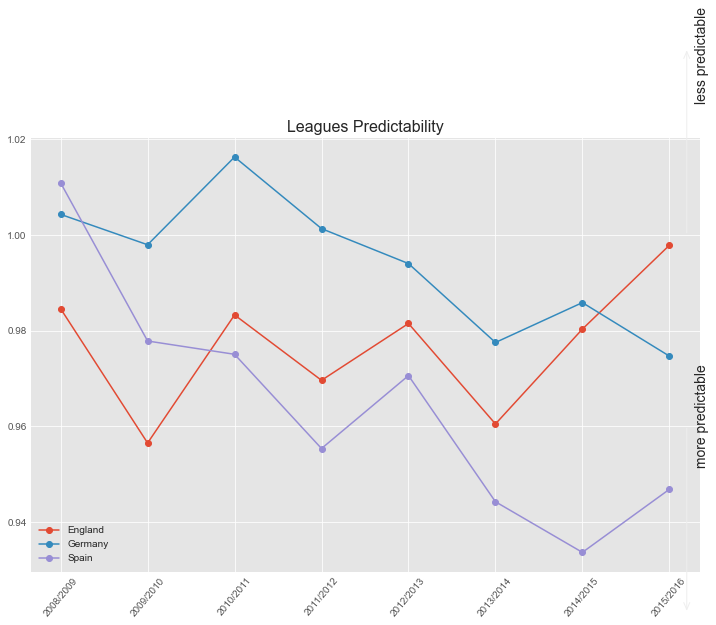

In [97]:
#plot graph
ax = entropy_means.plot(figsize=(12,8),marker='o')

#set title
plt.title('Leagues Predictability', fontsize=16)

#set ticks roatation
plt.xticks(rotation=50)

#keep colors for next graph
colors = [x.get_color() for x in ax.get_lines()]
colors_mapping = dict(zip(leagues.id,colors))

#remove x label
ax.set_xlabel('')

#locate legend 
plt.legend(loc='lower left')

#add arrows
ax.annotate('', xytext=(7.2, 1),xy=(7.2, 1.039),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('', xytext=(7.2, 0.96),xy=(7.2, 0.921),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('less predictable', xy=(7.3, 1.028), annotation_clip=False,fontsize=14,rotation='vertical')
ax.annotate('more predictable', xy=(7.3, 0.952), annotation_clip=False,fontsize=14,rotation='vertical')

#plt.savefig('figures/leagues_pred.png', bbox_inches='tight',dpi=600)

## Only EPL

In [98]:
# Considering English Premier League
main_countries = ['England']
countries = countries[countries.name.isin(main_countries)]
leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))
seasons = matches.season.unique()
leagues

,id,name,name_y,country_id,name_y
0,1729,England,England,1729,England Premier League


In [99]:
#Merge the leagues with corresponding matches

req_matches = matches2[matches2.league_id.isin(leagues['id'])]
req_matches = req_matches[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
req_matches["total_goals"] = req_matches['home_team_goal'] + req_matches['away_team_goal']
req_matches["result"] = req_matches.apply(res,axis = 1)
req_matches.dropna(inplace=True)
req_matches.tail()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
4763,4764,1729,8466,8197,2,2,2015/2016,4,0
4764,4765,1729,10003,10194,0,1,2015/2016,1,-1
4765,4766,1729,8586,8650,0,0,2015/2016,0,0
4766,4767,1729,9817,9825,0,3,2015/2016,3,-1
4767,4768,1729,8659,8472,1,0,2015/2016,1,1


In [100]:
new_matches = pd.merge(req_matches,leagues,left_on='league_id', right_on='id')
new_matches = new_matches.drop(['id_x','id_y','country_id'],axis = 1)
english = new_matches[new_matches.name == "England"]

# sum_goals = new_group_matches.home_team_goal.sum()
e = english.groupby('season')
seasons
%matplotlib inline


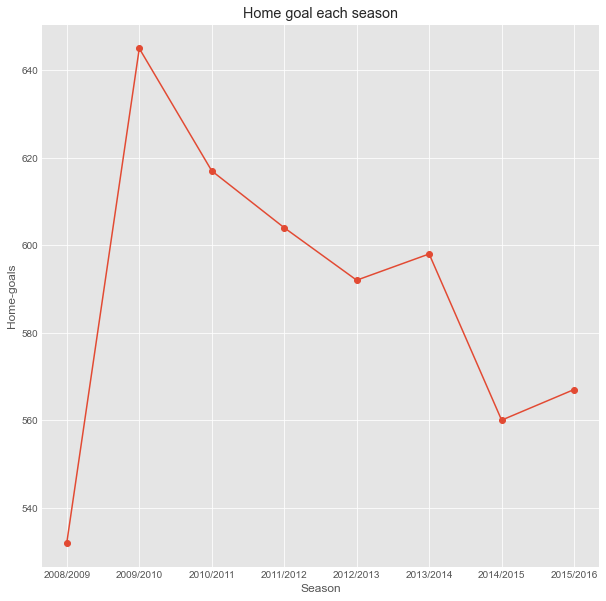

In [101]:
#Plotting home scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home goal each season')
plt.xlabel('Season')
plt.ylabel('Home-goals')
plt.plot(num_seasons,e.home_team_goal.sum().values,label = "English Premier League", marker = 'o')


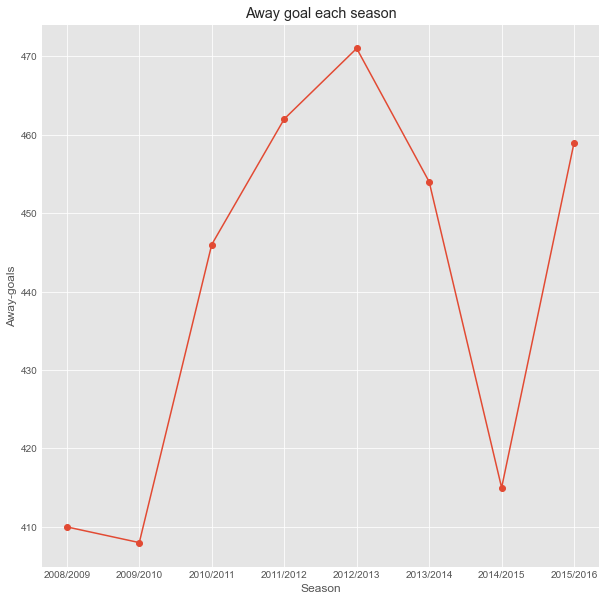

In [102]:
#Plotting away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Away goal each season')
plt.xlabel('Season')
plt.ylabel('Away-goals')
plt.plot(num_seasons,e.away_team_goal.sum().values,label = "English Premier League", marker = 'o')


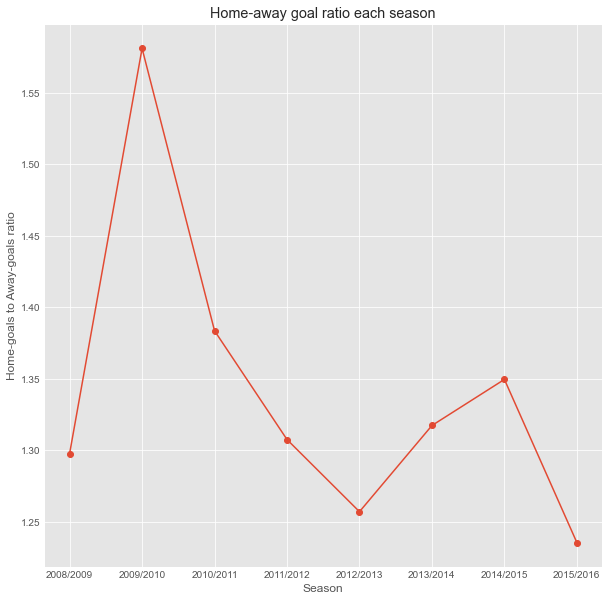

In [103]:
#Plotting home/away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home-away goal ratio each season')
plt.xlabel('Season')
plt.ylabel('Home-goals to Away-goals ratio')
plt.plot(num_seasons,e.home_team_goal.sum().values / e.away_team_goal.sum().values,label = "English Premier League", marker = 'o')


array([1.57272727, 2.12087912, 1.98888889, 1.47413793, 1.56603774,
       1.45528455, 1.49565217, 1.35344828])

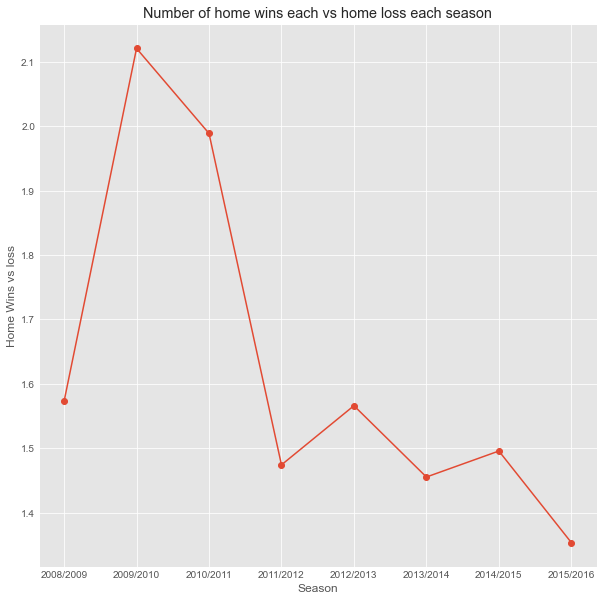

In [104]:
#Subsetting homewins vs homeloss from each of the leagues - ignoring draws.
e_hw = np.true_divide(english[english.result == 1].groupby('season').result.sum().values,english[english.result == -1].groupby('season').result.sum().values * -1)


#Plotting number of home wins vs home losses each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlim = (-20,20)
plt.ylim = (0,120)
plt.title("Number of home wins each vs home loss each season")
plt.xlabel("Season")
plt.ylabel("Home Wins vs loss")
plt.plot(num_seasons,e_hw,label = "English Premier League", marker = 'o')
display(e_hw)

In [106]:
# Read data from the CSV into a dataframe

loc = "Datasets\\"

raw_data_1 = pd.read_csv(loc + '2000-01.csv')
raw_data_2 = pd.read_csv(loc + '2001-02.csv')
raw_data_3 = pd.read_csv(loc + '2002-03.csv')
raw_data_4 = pd.read_csv(loc + '2003-04.csv')
raw_data_5 = pd.read_csv(loc + '2004-05.csv')
raw_data_6 = pd.read_csv(loc + '2005-06.csv')
raw_data_7 = pd.read_csv(loc + '2006-07.csv')
raw_data_8 = pd.read_csv(loc + '2007-08.csv')
raw_data_9 = pd.read_csv(loc + '2008-09.csv')
raw_data_10 = pd.read_csv(loc + '2009-10.csv')
raw_data_11 = pd.read_csv(loc + '2010-11.csv')
raw_data_12 = pd.read_csv(loc + '2011-12.csv')
raw_data_13 = pd.read_csv(loc + '2012-13.csv')
raw_data_14 = pd.read_csv(loc + '2013-14.csv')
raw_data_15 = pd.read_csv(loc + '2014-15.csv')
raw_data_16 = pd.read_csv(loc + '2015-16.csv')

In [107]:
# Selecting the features

raw_data_1 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_2 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_3 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_4 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_5 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_6 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_7 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_8 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_9 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_10 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_11 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_12 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_13 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_14 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_15 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_16 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]


In [108]:
# Concating the data on one dataframe

playing_stat = pd.concat([raw_data_1,raw_data_2,raw_data_3,raw_data_4,raw_data_5,raw_data_6,raw_data_7,raw_data_8,raw_data_9,raw_data_10,raw_data_11,raw_data_12,raw_data_13,raw_data_14,raw_data_15,raw_data_16],ignore_index=True)

In [109]:
playing_stat.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
6075,Man City,Chelsea,1,2,A,1,1,D,3,9,1,3,22,18,8,7,4,2,0,0
6076,Middlesbrough,West Ham,2,1,H,2,1,H,19,11,7,5,13,15,5,6,0,0,0,0
6077,Newcastle,Aston Villa,3,0,H,2,0,H,9,5,5,1,10,14,5,1,0,5,1,1
6078,Southampton,Arsenal,3,2,H,0,1,A,11,8,7,5,17,10,7,5,1,2,0,0
6079,Tottenham,Man United,3,1,H,1,1,D,9,15,3,6,13,15,3,6,0,2,0,0


In [110]:
# Creating csv file from the merged dataframe

playing_stat.to_csv(loc + "Merged_dataset.csv")

playing_stat.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Charlton,Man City,4,0,H,2,0,H,17,8,14,4,13,12,6,6,1,2,0,0
1,Chelsea,West Ham,4,2,H,1,0,H,17,12,10,5,19,14,7,7,1,2,0,0
2,Coventry,Middlesbrough,1,3,A,1,1,D,6,16,3,9,15,21,8,4,5,3,1,0
3,Derby,Southampton,2,2,D,1,2,A,6,13,4,6,11,13,5,8,1,1,0,0
4,Leeds,Everton,2,0,H,2,0,H,17,12,8,6,21,20,6,4,1,3,0,0


In [111]:
df = pd.read_csv("datasets\merged_dataset.csv")
df

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,Charlton,Man City,4,0,H,2,0,H,17,...,14,4,13,12,6,6,1,2,0,0
1,1,Chelsea,West Ham,4,2,H,1,0,H,17,...,10,5,19,14,7,7,1,2,0,0
2,2,Coventry,Middlesbrough,1,3,A,1,1,D,6,...,3,9,15,21,8,4,5,3,1,0
3,3,Derby,Southampton,2,2,D,1,2,A,6,...,4,6,11,13,5,8,1,1,0,0
4,4,Leeds,Everton,2,0,H,2,0,H,17,...,8,6,21,20,6,4,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,Man City,Chelsea,1,2,A,1,1,D,3,...,1,3,22,18,8,7,4,2,0,0
6076,6076,Middlesbrough,West Ham,2,1,H,2,1,H,19,...,7,5,13,15,5,6,0,0,0,0
6077,6077,Newcastle,Aston Villa,3,0,H,2,0,H,9,...,5,1,10,14,5,1,0,5,1,1
6078,6078,Southampton,Arsenal,3,2,H,0,1,A,11,...,7,5,17,10,7,5,1,2,0,0


In [112]:
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))
# table
avg_home_scored = df.FTHG.sum() / 6080.0
avg_away_scored = df.FTAG.sum() / 6080.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_away_conceded)


1.5447368421052632


In [113]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')
len(res_home['HomeTeam'].unique())
# df.head()

20

In [115]:
table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values
#19 Home matches for each team each season and 16 seasons therefore 304 home matches and 304 away matches
table.HAS = (table.HGS / 304.0) / avg_home_scored
table.AAS = (table.AGS / 304.0) / avg_away_scored
table.HDS = (table.HGC / 304.0) / avg_home_conceded
table.ADS = (table.AGC / 304.0) / avg_away_conceded
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
HomeTeam,,,,,,,,,
Arsenal,[Arsenal],720,288,1.533220,0.888889,208,400,0.641975,0.851789
Aston Villa,[Aston Villa],432,304,0.919932,0.938272,320,368,0.987654,0.783646
Bradford,[Bradford],320,160,0.681431,0.493827,464,656,1.432099,1.396934
Charlton,[Charlton],496,304,1.056218,0.938272,304,608,0.938272,1.294719
Chelsea,[Chelsea],704,384,1.499148,1.185185,320,400,0.987654,0.851789
Coventry,[Coventry],224,352,0.477002,1.086420,368,640,1.135802,1.362862
Derby,[Derby],368,224,0.783646,0.691358,384,560,1.185185,1.192504
Everton,[Everton],464,256,0.988075,0.790123,432,512,1.333333,1.090290
Ipswich,[Ipswich],496,416,1.056218,1.283951,240,432,0.740741,0.919932


In [116]:
#Extract necessary features from the data file
feature_table = df.iloc[:,:23]

#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS
0,Charlton,Man City,H,14,4,6,6,1.056218,0.938272,1.037037,1.158433
1,Chelsea,West Ham,H,10,5,7,7,1.499148,0.987654,1.037037,1.022147
2,Coventry,Middlesbrough,A,3,9,8,4,0.477002,1.135802,1.283951,0.715503
3,Derby,Southampton,D,4,6,5,8,0.783646,1.185185,0.641975,0.885860
4,Leeds,Everton,H,8,6,6,4,1.226576,1.037037,0.790123,1.090290
...,...,...,...,...,...,...,...,...,...,...,...
6075,Man City,Chelsea,A,1,3,8,7,0.681431,1.530864,1.185185,0.851789
6076,Middlesbrough,West Ham,H,7,5,5,6,0.613288,1.135802,1.037037,1.022147
6077,Newcastle,Aston Villa,H,5,1,5,1,0.885860,0.839506,0.938272,0.783646
6078,Southampton,Arsenal,H,7,5,7,5,0.919932,1.086420,0.888889,0.851789


In [117]:
feature_table.to_csv(loc + "Feature_table.csv")


In [118]:
#Function to transform FTR into numeric data type
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [164]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table.tail()
feature_table[feature_table['Result']==0]


,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS,Result
3,Derby,Southampton,D,4,6,5,8,0.783646,1.185185,0.641975,0.885860,0
5,Leicester,Aston Villa,D,4,3,5,4,0.954003,1.135802,0.938272,0.783646,0
12,Ipswich,Man United,D,8,6,4,6,1.056218,0.740741,1.481481,0.647359,0
13,Middlesbrough,Tottenham,D,6,4,5,5,0.613288,1.135802,0.790123,1.294719,0
20,Bradford,Leicester,D,4,8,6,8,0.681431,1.432099,0.543210,0.954003,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6066,Liverpool,Chelsea,D,8,7,6,6,1.362862,0.691358,1.185185,0.851789,0
6069,Newcastle,Arsenal,D,2,1,4,8,0.885860,0.839506,0.888889,0.851789,0
6071,Coventry,Bradford,D,7,3,9,3,0.477002,1.135802,0.493827,1.396934,0
6072,Derby,Ipswich,D,2,6,3,11,0.783646,1.185185,1.283951,0.919932,0


In [128]:
X_train = feature_table[['HAS','HDS','AAS','ADS']]
X_train_2 = feature_table[['HAS','HDS','AAS','ADS','HST','AST','HC','AC']]
y_train = feature_table['Result']
display(X_train.tail())
display(X_train_2.tail())

,HAS,HDS,AAS,ADS
6075,0.681431,1.530864,1.185185,0.851789
6076,0.613288,1.135802,1.037037,1.022147
6077,0.885860,0.839506,0.938272,0.783646
6078,0.919932,1.086420,0.888889,0.851789
6079,1.056218,0.790123,1.481481,0.647359


,HAS,HDS,AAS,ADS,HST,AST,HC,AC
6075,0.681431,1.530864,1.185185,0.851789,1,3,8,7
6076,0.613288,1.135802,1.037037,1.022147,7,5,5,6
6077,0.885860,0.839506,0.938272,0.783646,5,1,5,1
6078,0.919932,1.086420,0.888889,0.851789,7,5,7,5
6079,1.056218,0.790123,1.481481,0.647359,3,6,3,6


### Predction

In [129]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [132]:
nbb_scores = []
nbb_scores_2 = []

list=[1e-1,1e-2,1e-3,1e-4]
for i in list:
    clf1 = MultinomialNB(alpha=i)
    clf1.fit(X_train,y_train)
    clf1.fit(X_train_2,y_train)
    scores = cross_val_score(clf1, X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
    nbb_scores.append(scores.mean())  
    nbb_scores_2.append(scores_2.mean())

NB alpha  0.1   0.4638157894736842  :  0.5317434210526317
NB alpha  0.01   0.4638157894736842  :  0.5317434210526317
NB alpha  0.001   0.4638157894736842  :  0.5317434210526317
NB alpha  0.0001   0.4638157894736842  :  0.5317434210526317


In [123]:
clf = [MultinomialNB(alpha=1e-10), SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]
labels = [ 'Naive Bayes', 'SVM', 'Log regres']
mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,3):
    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)
    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())


Naive Bayes  :  0.48421052631578937  :  0.5643092105263159
SVM  :  0.5398026315789475  :  0.6118421052631579


c:\users\karti\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\karti\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Log regres  :  0.5467105263157894  :  0.5909539473684211


c:\users\karti\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


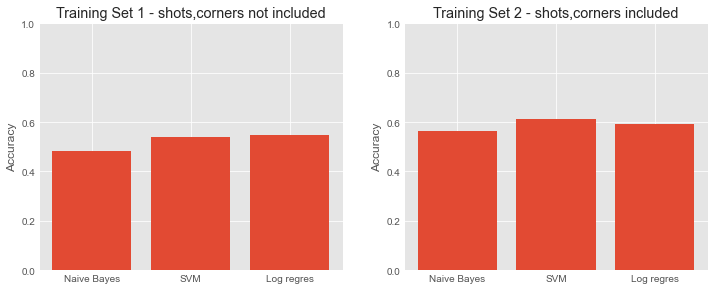

In [134]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,3),mean_scores,align='center');
ax.set_xticks(range(3));
ax.set_xticks(range(3));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1 - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,3),mean_scores_2,align='center');
ax2.set_xticks(range(3))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2 - shots,corners included")
ax2.set_xticklabels(labels);


In [135]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train)
X_train_2 = normalize(X_train_2)
pd.set_option('display.expand_frame_repr', False)
display(X_train)

array([[0.25143472, 0.33855342, 0.72465647, 0.54500933],
       [0.72857951, 0.35970538, 0.36425861, 0.45508197],
       [0.04797988, 0.10673184, 0.65431256, 0.74711533],
       ...,
       [0.07467198, 0.11407244, 0.56776964, 0.81181846],
       [0.27909781, 0.44144105, 0.72813339, 0.44390987],
       [0.9148007 , 0.39927682, 0.04085623, 0.04526   ]])

In [136]:
display(X_train_2)

array([[0.02284858, 0.0307653 , 0.06585156, ..., 0.23637427, 0.35456141,
        0.35456141],
       [0.09324819, 0.04603736, 0.04662011, ..., 0.33207115, 0.4648996 ,
        0.4648996 ],
       [0.00231666, 0.00515344, 0.03159284, ..., 0.68946339, 0.61285635,
        0.30642817],
       ...,
       [0.00774619, 0.01183345, 0.05889829, ..., 0.367805  , 0.64365875,
        0.367805  ],
       [0.05365818, 0.08486961, 0.13998788, ..., 0.3212205 , 0.74951451,
        0.5353675 ],
       [0.16368002, 0.0714403 , 0.00731017, ..., 0.        , 0.79524688,
        0.1136067 ]])

In [138]:
#With Normalization
clf = [MultinomialNB(alpha=10), SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'SVM', 'Log regres']

mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,3):

    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())

Naive Bayes  :  0.48421052631578937  :  0.5643092105263159
SVM  :  0.5398026315789475  :  0.6118421052631579


c:\users\karti\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\karti\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Log regres  :  0.5467105263157894  :  0.5909539473684211


c:\users\karti\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\karti\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

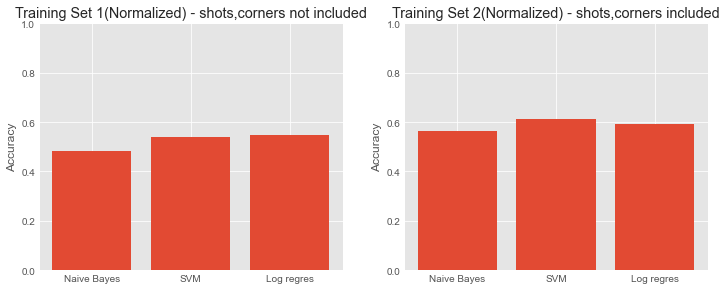

In [140]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,3),mean_scores,align='center');
ax.set_xticks(range(3));
ax.set_xticks(range(3));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1(Normalized) - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,3),mean_scores_2,align='center');
ax2.set_xticks(range(3))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2(Normalized) - shots,corners included")
ax2.set_xticklabels(labels);


In [185]:
for i in range(0,3):
    print(labels[i],clf[i].predict([[0.783646,1.185185,0.641975,0.885860,4,6,5,8]]))

Naive Bayes [-1]
SVM [1]
Log regres [0]
